In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Advertising.csv')
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [3]:
# to drop unnamed column

df.columns.str.match("Unnamed")
df.loc[:,~df.columns.str.match("Unnamed")]

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [4]:
df.isnull().sum()


# no null data

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

<AxesSubplot:>

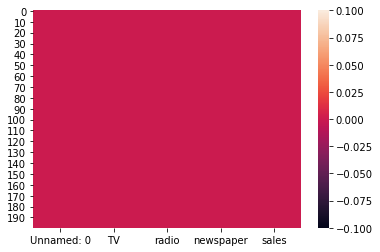

In [5]:
sn.heatmap(df.isnull())

In [6]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


# EDA

Unnamed: 0       AxesSubplot(0.125,0.657941;0.133621x0.222059)
TV            AxesSubplot(0.285345,0.657941;0.133621x0.222059)
radio          AxesSubplot(0.44569,0.657941;0.133621x0.222059)
newspaper     AxesSubplot(0.606034,0.657941;0.133621x0.222059)
sales         AxesSubplot(0.766379,0.657941;0.133621x0.222059)
dtype: object

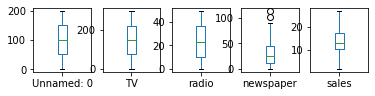

In [37]:
df.plot(kind='box',subplots=True,layout=(3,5))

# can't see outliers in dataset except newspaper, but that too are close to whiskers so not optning outliers removal

<AxesSubplot:xlabel='TV', ylabel='Density'>

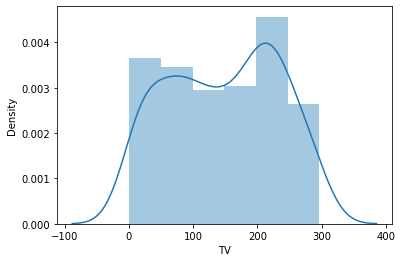

In [34]:
sn.distplot(df['TV'])

<AxesSubplot:xlabel='radio', ylabel='Density'>

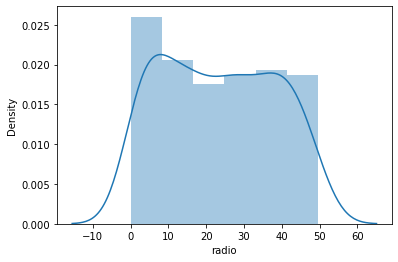

In [35]:
sn.distplot(df['radio'])

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

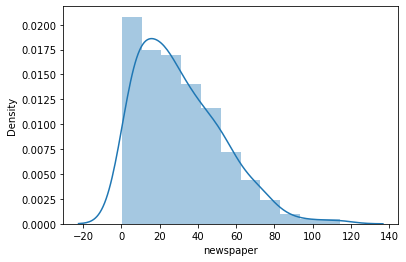

In [36]:
sn.distplot(df['newspaper'])

In [38]:
# Model Building

x=df.drop('sales',axis=1)
y=df['sales']

In [9]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.33,random_state=30)

In [10]:
lm=LinearRegression()

In [11]:
lm.fit(x_train,y_train)
LinearRegression()

LinearRegression()

In [12]:
lm.coef_

array([-0.00278674,  0.0438837 ,  0.18126274,  0.00772456])

In [13]:
lm.intercept_

3.4195229498767628

In [14]:
lm.score(x_train,y_train)

0.8871971941705347

In [15]:
cor=df.corr()

In [16]:
cor

,Unnamed: 0,TV,radio,newspaper,sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
radio,-0.110680,0.054809,1.000000,0.354104,0.576223
newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
sales,-0.051616,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

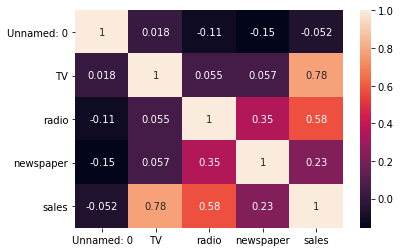

In [17]:
sn.heatmap(cor,annot=True)

In [39]:
# TV advertising has got high correlation with sales feature

In [18]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lm.fit(x_train,y_train)
    pred_train=lm.predict(x_train)
    pred_test=lm.predict(x_test)
    print(f"At random state {i},the training accuracy is:-{r2_score(y_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is:-{r2_score(y_test,pred_test)}")
    print("\n")

At random state 0,the training accuracy is:-0.9073274552252846
At random state 0,the testing accuracy is:-0.8564802143279249


At random state 1,the training accuracy is:-0.8959391993971187
At random state 1,the testing accuracy is:-0.8928781912093181


At random state 2,the training accuracy is:-0.9152614531156524
At random state 2,the testing accuracy is:-0.7570326409482369


At random state 3,the training accuracy is:-0.8931443451313652
At random state 3,the testing accuracy is:-0.913444967458206


At random state 4,the training accuracy is:-0.8911682084041699
At random state 4,the testing accuracy is:-0.9084934434517353


At random state 5,the training accuracy is:-0.89570620107301
At random state 5,the testing accuracy is:-0.8985195836305802


At random state 6,the training accuracy is:-0.8915582028345674
At random state 6,the testing accuracy is:-0.9219412229135812


At random state 7,the training accuracy is:-0.8929171093102488
At random state 7,the testing accuracy is:-0.909494

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=12)

In [20]:
lm.fit(x_train,y_train)

LinearRegression()

In [21]:
pred_test=lm.predict(x_test)

In [22]:
print(r2_score(y_test,pred_test))

0.9110007582766771


# Cross Validation of the Model

In [23]:
train_accuracy=r2_score(y_train,pred_train)
test_accuracy=r2_score(y_test,pred_test)
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lm,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold{j} the cv score is {cv_mean} and accuracy score for training is {train_accuracy}and accuracy for the testing is {test_accuracy}")
    print("\n")

At cross fold2 the cv score is 0.8557808905096392 and accuracy score for training is -1.1005688286388953and accuracy for the testing is 0.9110007582766771


At cross fold3 the cv score is 0.8913539823868294 and accuracy score for training is -1.1005688286388953and accuracy for the testing is 0.9110007582766771


At cross fold4 the cv score is 0.8858779626590164 and accuracy score for training is -1.1005688286388953and accuracy for the testing is 0.9110007582766771


At cross fold5 the cv score is 0.8842777844741689 and accuracy score for training is -1.1005688286388953and accuracy for the testing is 0.9110007582766771


At cross fold6 the cv score is 0.8877823078964706 and accuracy score for training is -1.1005688286388953and accuracy for the testing is 0.9110007582766771


At cross fold7 the cv score is 0.8830284351379023 and accuracy score for training is -1.1005688286388953and accuracy for the testing is 0.9110007582766771


At cross fold8 the cv score is 0.879505934736525 and accur

# Regularization

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score


In [25]:
from sklearn.linear_model import Lasso
parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 0.01, 'random_state': 0}


In [26]:
ls=Lasso(alpha=0.01,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)
lss=r2_score(y_test,pred_ls)
lss

0.9110263280759735

In [27]:
from sklearn.linear_model import Ridge
parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
rd=Ridge()
clf=GridSearchCV(rd,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)


{'alpha': 10, 'random_state': 0}


In [28]:
rd=Ridge(alpha=10,random_state=0)
rd.fit(x_train,y_train)
rd.score(x_train,y_train)
pred_rd=rd.predict(x_test)
rdd=r2_score(y_test,pred_rd)
rdd

0.9110144294727794

In [29]:
cv_score=cross_val_score(ls,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.8842974176393481

In [30]:
cv_score=cross_val_score(rd,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.8842812917853875

# Ensemble Technique

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
parameters={'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'auto'}


In [32]:
rf=RandomForestRegressor(criterion='mae',max_features="auto")
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)
rfs=r2_score(y_test,pred_decision)
print('R2 Score:',rfs*100)
rfscore=cross_val_score(rf,x,y,cv=5)
rfc=rfscore.mean()
print('cross val score:',rfc*100)

R2 Score: 98.2743980741481
cross val score: 97.22769468541867


# Random forest regressor is performing with 98% accuracy compared to Lasso and Ridge, so we chose Random Forest model

In [33]:
# Saving The Model

import joblib
joblib.dump(rfc,"salesprediction.pkl")

['salesprediction.pkl']